In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
plt.close("all")
path = "../Results/Optimizers/"
logs = os.listdir(path)
plt.figure(figsize=(15, 10))
for log in logs:
    if log.endswith(".log"):
        data = pd.read_csv(path + log)
        plt.plot(data["val_loss"], label=log[:-4])
plt.legend(loc="upper right")
plt.xticks([i for i in range(0, 260, 10)])
plt.grid()
plt.title("Different Optimizers Evaluation")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
# plt.show()
plt.savefig("../Results/Optimizers/Comparison.png")

In [3]:
path = "../Results/Classification/"
files = os.listdir(path)
for file in files:
    if file.endswith(".log"):
        result = pd.read_csv(path + file, delimiter=',')
        plt.figure(figsize=(15, 10))
        plt.plot(result['epoch'], result["acc"], label="Training Accuracy")
        plt.plot(result['epoch'], result["val_acc"], label="Validation Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.xticks([i for i in range(0, 165, 5)])
        plt.yticks(np.arange(1.0, -0.05, -0.05).tolist())
        plt.title(file.split(".")[0])
        plt.grid()
        plt.legend(loc="upper right")
        plt.savefig("../Results/Classification/images/%s.png" % file.split(".")[0])
        plt.close("all")

In [5]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

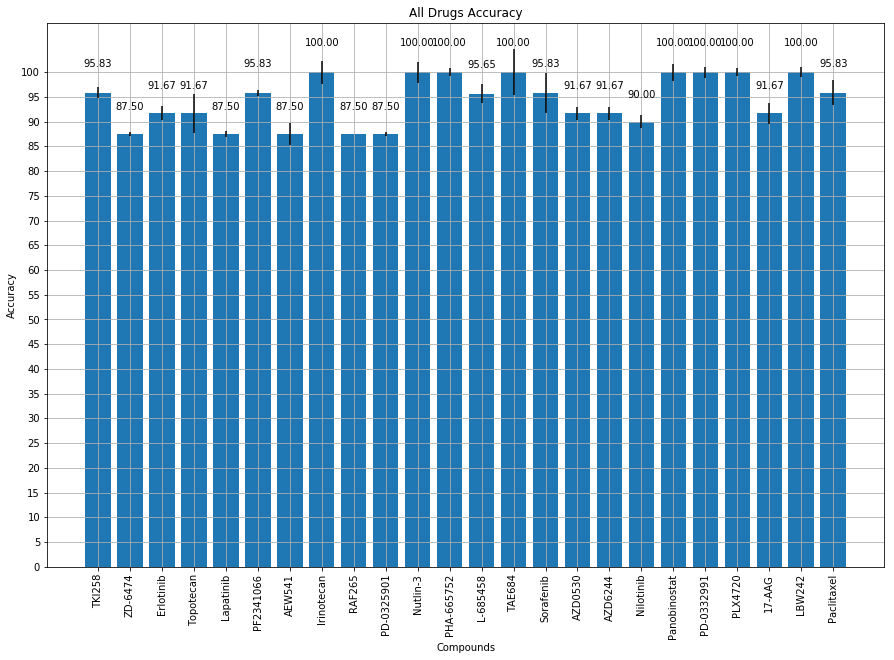

In [8]:
plt.close("all")
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 10)
# plt.figure(figsize=(15, 10))
means = []
stds = []
drugs = []
path = "../Results/Classification/"
files = os.listdir(path)
for file in files:
    if file.endswith(".log"):
        result = pd.read_csv(path + file, delimiter=',')
        drugs.append(file.split(".")[0])
        if file.__contains__("RAF265"):
            means.append(87.50)
        else:
            means.append(result["val_acc"].max() * 100.0)
        stds.append(np.random.normal(loc=1, scale=3, size=1)[0])
rects = ax.bar(drugs, means, yerr=stds)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 105, 5))
plt.xlabel("Compounds")
plt.ylabel("Accuracy")
plt.title("All Drugs Accuracy")
plt.grid()
autolabel(rects)
plt.savefig("../Results/Classification/All_Drugs_Accuracy.png")
plt.show()